# SpaceX Falcon 9 first stage Landing Prediction

## EDA and Visualization

### import pandas as a requiered library

In [ ]:
import pandas as pd

### Read the SpaceX dataset into a Pandas dataframe and print it

In [3]:
df=pd.read_csv('dataset_falcon9.csv')
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


### Let's try to explore the details of data frame

### the info fucntion shows a summary of dataset including column's names, type of data for each column and number of non-nulls in each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
df['BoosterVersion']

0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [6]:
set(df['BoosterVersion'])

{'Falcon 9'}

In [7]:
df['PayloadMass']

0      6104.959412
1       525.000000
2       677.000000
3       500.000000
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

In [8]:
df['PayloadMass'].min()

350.0

In [9]:
df['PayloadMass'].max()

15600.0

In [10]:
df['PayloadMass'].mean()

6104.959411764707

In [11]:
df['PayloadMass'].std()

4694.671719712728

In [12]:
df['PayloadMass'].describe()

count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64

In [13]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


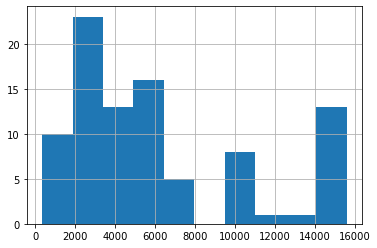

In [14]:
df['PayloadMass'].hist()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

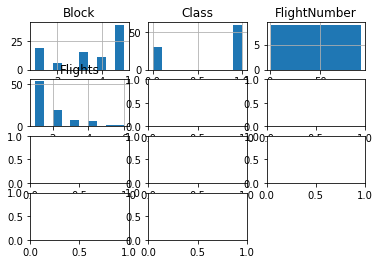

In [28]:
df.hist()

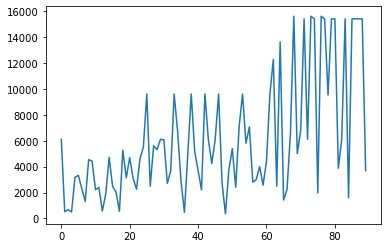

In [16]:
df['PayloadMass'].plot()

### Each launch aims to a dedicated orbit

In [17]:
df['Orbit']

0      LEO
1      LEO
2      ISS
3       PO
4      GTO
      ... 
85    VLEO
86    VLEO
87    VLEO
88    VLEO
89     MEO
Name: Orbit, Length: 90, dtype: object

In [18]:
set(df['Orbit'])

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

### Orbits are shown in the following plot:

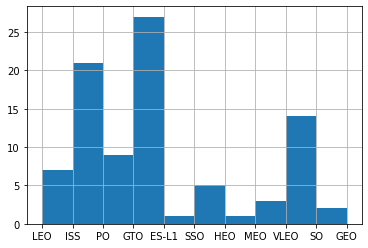

In [20]:
df['Orbit'].hist()

In [19]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [21]:
df_success=df[df['Class']==1]

In [22]:
df_success

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
12,13,2015-02-11,Falcon 9,570.000000,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1
16,17,2015-12-22,Falcon 9,2034.000000,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857,1
19,20,2016-04-08,Falcon 9,3136.000000,ISS,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.577366,28.561857,1
20,21,2016-05-06,Falcon 9,4696.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1022,-80.577366,28.561857,1
21,22,2016-05-27,Falcon 9,3100.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1023,-80.577366,28.561857,1
22,23,2016-07-18,Falcon 9,2257.000000,ISS,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,2.0,1,B1025,-80.577366,28.561857,1
23,24,2016-08-14,Falcon 9,4600.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1026,-80.577366,28.561857,1
25,26,2017-01-14,Falcon 9,9600.000000,PO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1029,-120.610829,34.632093,1


In [23]:
df_fail=df[df['Class']!=1]

In [24]:
df_fail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 76
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    30 non-null     int64  
 1   Date            30 non-null     object 
 2   BoosterVersion  30 non-null     object 
 3   PayloadMass     30 non-null     float64
 4   Orbit           30 non-null     object 
 5   LaunchSite      30 non-null     object 
 6   Outcome         30 non-null     object 
 7   Flights         30 non-null     int64  
 8   GridFins        30 non-null     bool   
 9   Reused          30 non-null     bool   
 10  Legs            30 non-null     bool   
 11  LandingPad      9 non-null      object 
 12  Block           30 non-null     float64
 13  ReusedCount     30 non-null     int64  
 14  Serial          30 non-null     object 
 15  Longitude       30 non-null     float64
 16  Latitude        30 non-null     float64
 17  Class           30 non-null     int64

In [25]:
df_success['Orbit'].value_counts()

GTO      14
ISS      13
VLEO     12
PO        6
LEO       5
SSO       5
MEO       2
ES-L1     1
GEO       1
HEO       1
Name: Orbit, dtype: int64

In [26]:
df_fail['Orbit'].value_counts()

GTO     13
ISS      8
PO       3
VLEO     2
LEO      2
SO       1
MEO      1
Name: Orbit, dtype: int64

In [27]:
# Apply value_counts() on column LaunchSite
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [29]:
# Apply value_counts() on column Outcome
df['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64

In [30]:
df_success['Outcome'].value_counts()

True ASDS     41
True RTLS     14
True Ocean     5
Name: Outcome, dtype: int64

In [31]:
df_fail['Outcome'].value_counts()

None None      19
False ASDS      6
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64

In [32]:
df['Flights']

0     1
1     1
2     1
3     1
4     1
     ..
85    2
86    3
87    6
88    3
89    1
Name: Flights, Length: 90, dtype: int64

In [33]:
df['Flights'].value_counts()

1    53
2    19
3     8
4     6
6     2
5     2
Name: Flights, dtype: int64

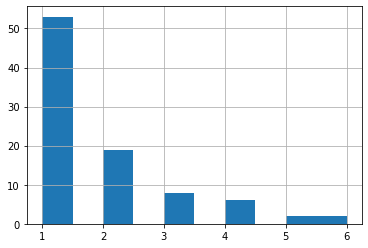

In [34]:
df['Flights'].hist()

In [35]:
df['GridFins'].value_counts()

True     70
False    20
Name: GridFins, dtype: int64

In [36]:
df['Reused'].value_counts()

False    53
True     37
Name: Reused, dtype: int64

In [37]:
df_success['Reused'].value_counts()

False    31
True     29
Name: Reused, dtype: int64

In [38]:
df['Legs'].value_counts()

True     71
False    19
Name: Legs, dtype: int64

In [39]:
df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [40]:
df['Block'].value_counts()

5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: Block, dtype: int64

In [41]:
df['ReusedCount'].value_counts()

0    30
1    24
3    12
5    11
2     9
4     4
Name: ReusedCount, dtype: int64

In [42]:
df['Serial'].value_counts()

B1049    6
B1051    5
B1059    4
B1046    4
B1056    4
B1048    4
B1058    3
B1047    3
B1060    3
B1041    2
B1031    2
B1039    2
B1045    2
B1032    2
B1036    2
B1029    2
B1040    2
B1021    2
B1035    2
B1004    1
B1011    1
B1018    1
B1034    1
B1012    1
B1062    1
B1054    1
B1003    1
B1022    1
B1020    1
B1023    1
B1050    1
B1043    1
B1013    1
B1010    1
B1044    1
B1038    1
B1005    1
B1017    1
B0007    1
B1006    1
B1016    1
B1026    1
B1037    1
B1019    1
B0003    1
B0005    1
B1025    1
B1030    1
B1028    1
B1008    1
B1007    1
B1015    1
B1042    1
Name: Serial, dtype: int64

In [43]:
df['Latitude'].value_counts()

28.561857    55
28.608058    22
34.632093    13
Name: Latitude, dtype: int64

In [44]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [45]:
df=df.drop(['BoosterVersion','Serial','Longitude','Latitude'],axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   Date          90 non-null     object 
 2   PayloadMass   90 non-null     float64
 3   Orbit         90 non-null     object 
 4   LaunchSite    90 non-null     object 
 5   Outcome       90 non-null     object 
 6   Flights       90 non-null     int64  
 7   GridFins      90 non-null     bool   
 8   Reused        90 non-null     bool   
 9   Legs          90 non-null     bool   
 10  LandingPad    64 non-null     object 
 11  Block         90 non-null     float64
 12  ReusedCount   90 non-null     int64  
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


### Matplotlib & Seaborn Libraries

In [47]:
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

### Visualize the relationship between Flight Number and Payload Mass

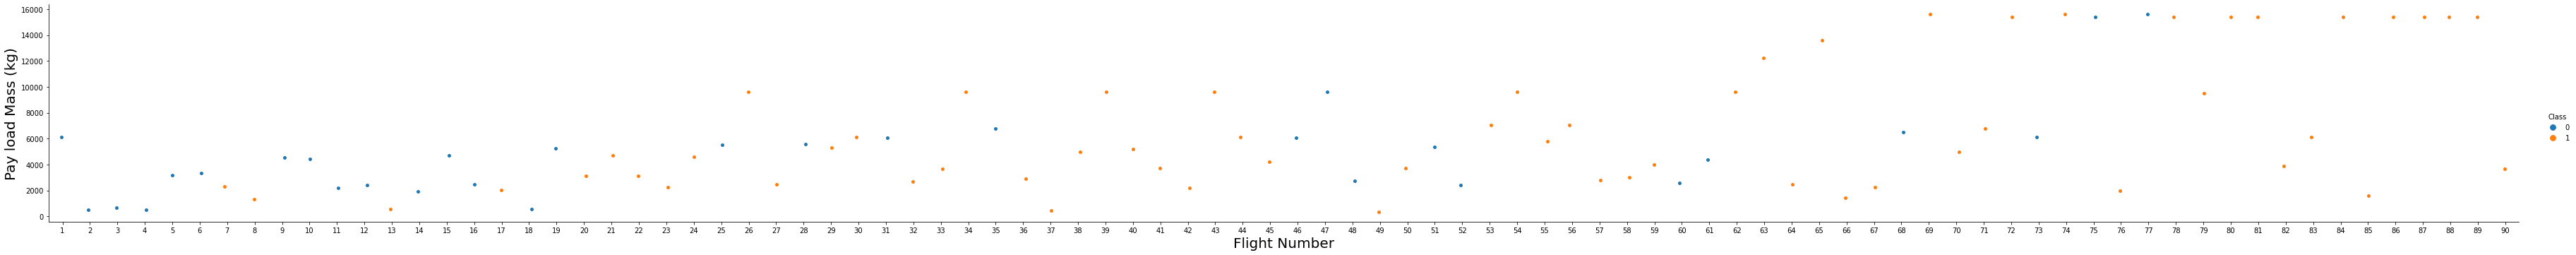

In [49]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 10)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualize the relationship between Flight Number and Launch Site

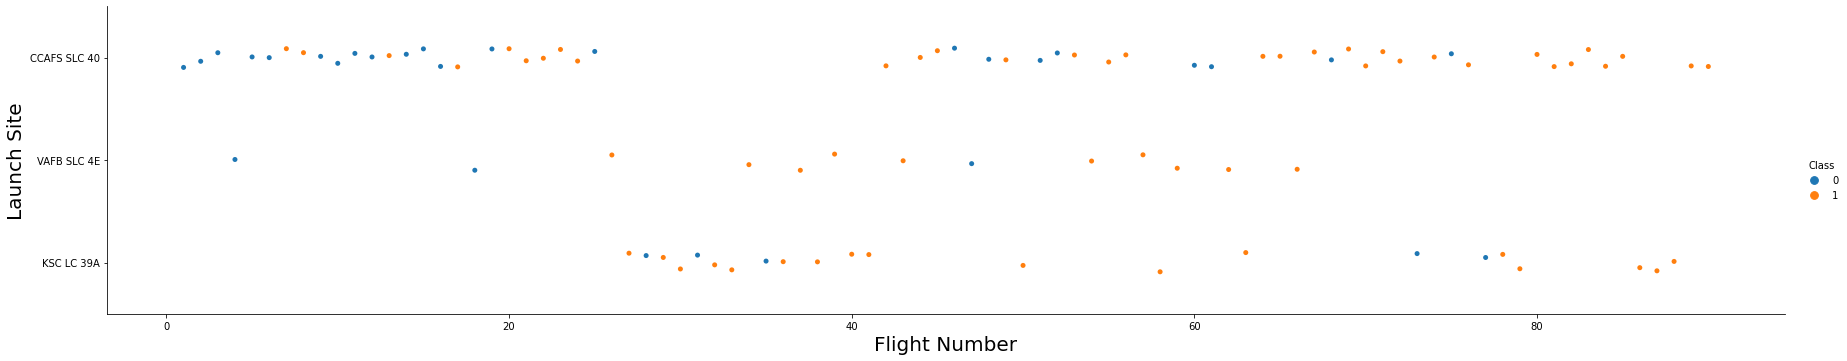

In [50]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### Visualize the relationship between Payload and Launch Site

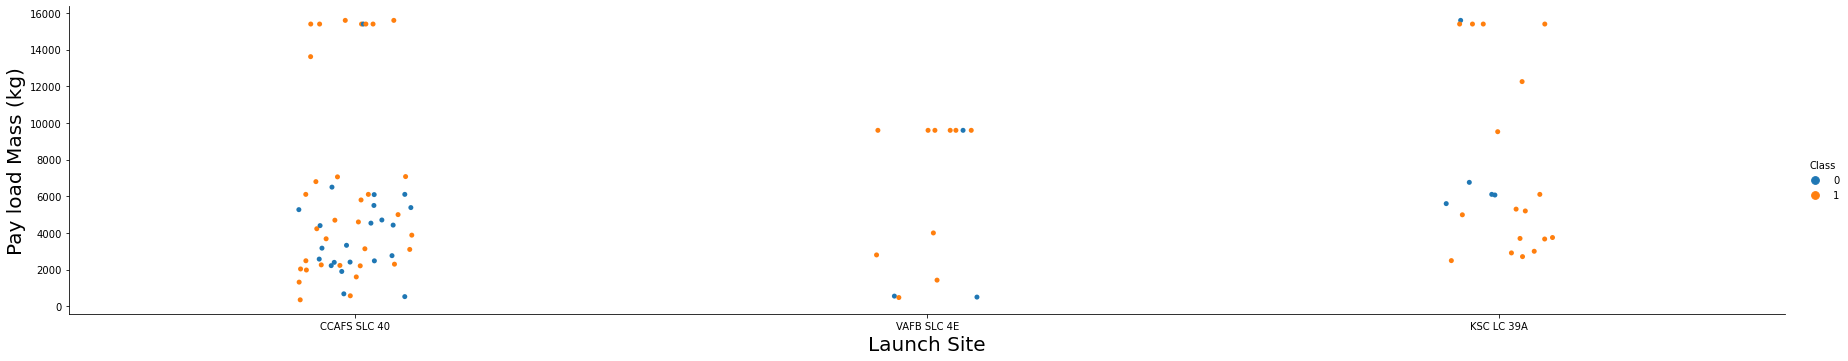

In [51]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualize the relationship between FlightNumber and Orbit type

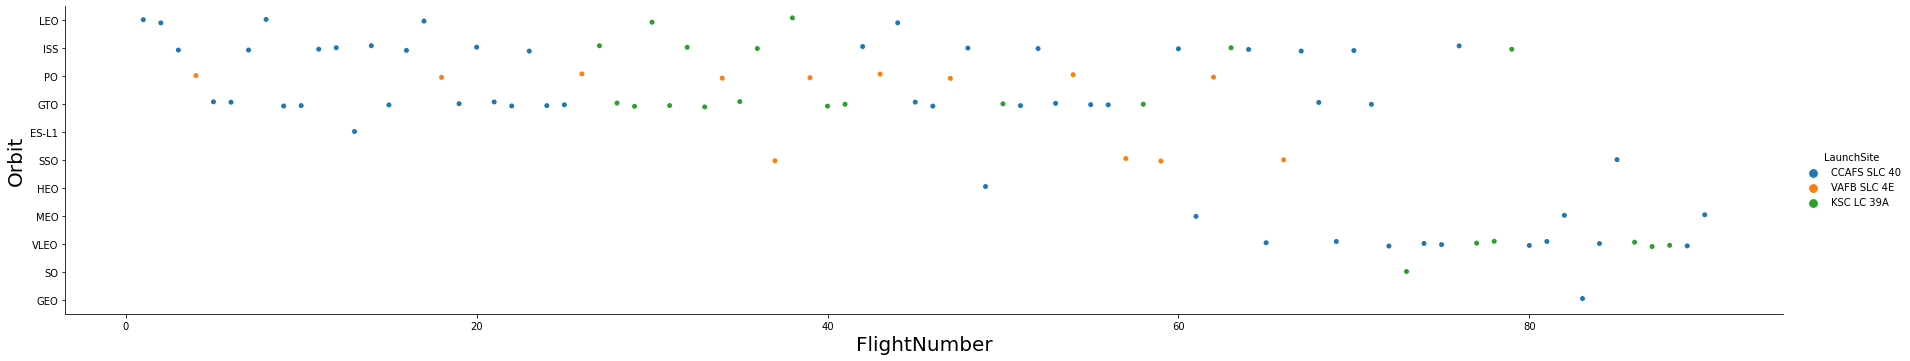

In [53]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="LaunchSite", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

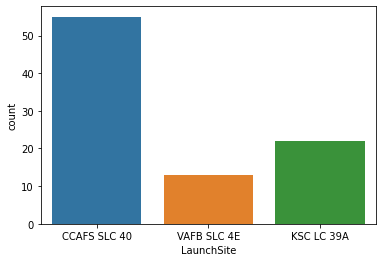

In [55]:
sns.countplot(x='LaunchSite',data=df)